In [11]:
from transformers import pipeline, AutoTokenizer

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=0,  # Use GPU if available
)

/home/ubuntu/.conda/envs/cse158a2/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [9]:
data = pd.read_json('image_review_all.json', lines=True)

/home/ubuntu/.conda/envs/cse158a2/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [12]:
data['sentiment_score'] = data['review_text'].apply(
    lambda x: sentiment_pipeline(x, truncation=True, padding=True)[0]['score'] if isinstance(x, str) else 0
)

In [13]:
# print('hi')

hi


In [14]:
# Plot Sentiment vs. Ratings
plt.figure(figsize=(10, 6))
plt.scatter(data['rating'], data['sentiment_score'], alpha=0.7, label='Sentiment Score')
plt.title('Sentiment Scores vs. Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.axhline(0, color='red', linestyle='--', label='Neutral Sentiment')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/home/ubuntu/.conda/envs/cse158a2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)

KeyboardInterrupt



In [28]:
# data['pics'].iloc[0]

In [29]:
# data['pics'].iloc[1]

In [17]:
# data.to_csv('sentiment_analysis_results.csv', index=False)

In [49]:
data['standard_z'] = data.groupby('rating')['sentiment_score'].apply(lambda x: (x - x.mean())/x.std())

In [51]:
filtered_data = data[data['standard_z'].between(-1, 1)]

In [54]:
filtered_data.groupby('rating')['sentiment_score'].mean()

rating
1    0.996016
2    0.991427
3    0.985481
4    0.994522
5    0.998477
Name: sentiment_score, dtype: float64

In [55]:
data.groupby('rating')['sentiment_score'].mean()

rating
1    0.986087
2    0.971951
3    0.957355
4    0.978378
5    0.992300
Name: sentiment_score, dtype: float64

In [66]:
print(data.iloc[2].review_text)

This place doesn’t rock the senses when it comes to flavors. Beautiful restaurant, great layout, art and fun upbeat music but here where the fun stuff ends.
Great plate presentations but unfortunately lacking in delivering the flavors needed for an all around satisfactory outcome.
Service was good, and attentive but I wish the food was as good.
The chicken was dry, the rice from uncle Ben era, and the tortillas & cheese needed more heat, and color. Salt 🧂 could have helped in perking up the blandness of the meal.
Salsa was pretty good.
Best


In [24]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

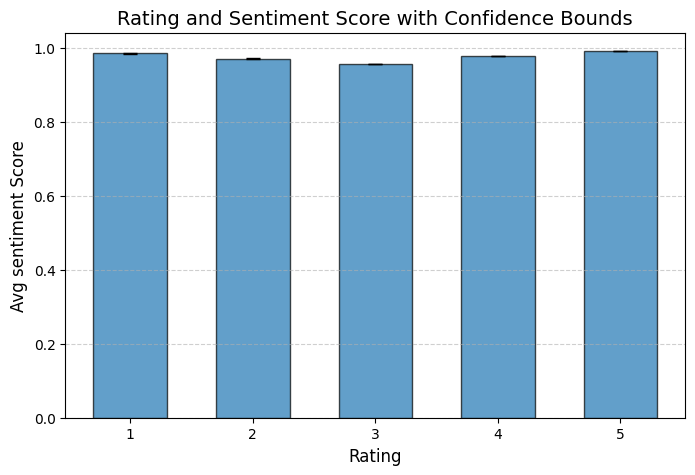

In [68]:
pic_rate = pd.DataFrame({
    'rating': data['rating'],
    'num_pics': data['sentiment_score']
})

# Calculate the mean, standard deviation, and count
pic_rate_stat = pic_rate.groupby('rating').agg(
    mean_num_pics=('num_pics', 'mean'),
    std_num_pics=('num_pics', 'std'),
    count=('num_pics', 'count')
).reset_index()

# Compute standard error and confidence interval (95% CI)
confidence = 0.9999
pic_rate_stat['sem'] = pic_rate_stat['std_num_pics'] / np.sqrt(pic_rate_stat['count'])
t_value = t.ppf((1 + confidence) / 2, pic_rate_stat['count'] - 1)
pic_rate_stat['ci'] = t_value * pic_rate_stat['sem']

# Create the bar plot with error bars
plt.figure(figsize=(8, 5))
plt.bar(
    pic_rate_stat['rating'],
    pic_rate_stat['mean_num_pics'],
    width=0.6,
    yerr=pic_rate_stat['ci'],  # Use the CI as error bars
    capsize=5,
    edgecolor='black',
    alpha=0.7
)

# Add labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Avg sentiment Score', fontsize=12)
plt.title('Rating and Sentiment Score with Confidence Bounds', fontsize=14)

# Optional: Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show the plot
plt.savefig('sentiment_anan')
plt.show()

In [58]:
import seaborn as sns

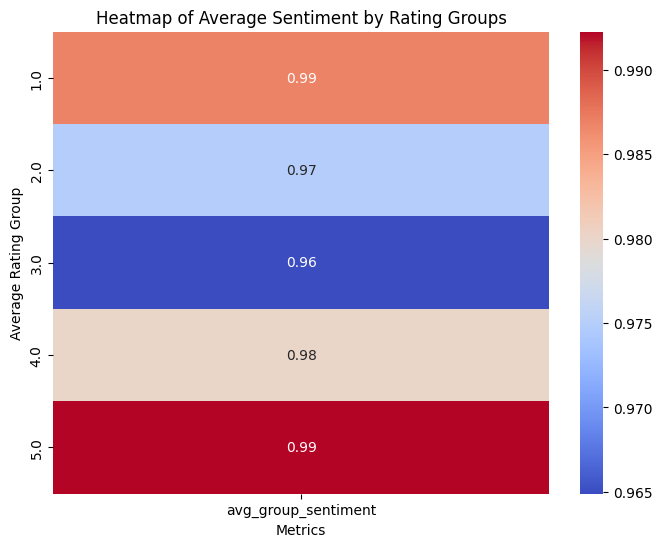

In [61]:
user_stats = data.groupby('user_id').agg(
    avg_rating=('rating', 'mean'),
    avg_sentiment=('sentiment_score', 'mean')
).reset_index()

# Group users by their average rating
user_stats['avg_rating_group'] = user_stats['avg_rating'].round()  # Group by rounded average rating

# Calculate average sentiment for each rating group
group_stats = user_stats.groupby('avg_rating_group').agg(
    avg_group_sentiment=('avg_sentiment', 'mean'),
    count=('avg_sentiment', 'count')  # For visualization purposes
).reset_index()

# Create a pivot table for the heatmap
heatmap_data = group_stats.pivot_table(
    index='avg_rating_group',
    values='avg_group_sentiment'
)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Heatmap of Average Sentiment by Rating Groups')
plt.xlabel('Metrics')
plt.ylabel('Average Rating Group')
plt.show()